<a href="https://colab.research.google.com/github/JeancoMontoyaC/Proyectos-IA/blob/main/Proyecto_continentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# **Proyecto 2:** Incidencia de tuberculosis a nivel mundial
---
 Inteligencia Artificial-Universidad Nacional de Colombia

---
**Por:**

Alejandra Barrientos Grisales

Jean Carlo Montoya Castro

Alejandro Salazar Mejía

---
</center>


# **Objetivo**: Buscar tendencias en la indicencia de tuberculosis en los países del mundo junto con otras características como el HDI y PIB que puedan estar relacionadas, mediantes técnicas de Aprendizaje no-supervisado.



In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from tabulate import tabulate 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (25, 12)
plt.style.use('ggplot')

## 1. Exploración de datos dataset tuberculosis: 


In [ ]:
#Para abrir desde colab
from google.colab import files
import io
uploaded = files.upload()
Tuberculosis_df = pd.read_csv(io.BytesIO(uploaded["Tuberculosis incidence (per 100,000 people).csv"]))


Saving Tuberculosis incidence (per 100,000 people).csv to Tuberculosis incidence (per 100,000 people).csv


Visualización del dataset original

In [ ]:
Tuberculosis_df

,"Tuberculosis incidence (per 100,000 people)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,HDI Rank (2018),Country,2000,NaN,2005,NaN,2010,NaN,2011,NaN,...,NaN,2013,NaN,2014,NaN,2015,NaN,2016,NaN,2017
1,170,Afghanistan,190,NaN,189,NaN,189,NaN,189,NaN,...,NaN,189,NaN,189,NaN,189,NaN,189,NaN,189
2,69,Albania,22,NaN,19,NaN,17,NaN,17,NaN,...,NaN,19,NaN,16,NaN,16,NaN,16,NaN,20
3,82,Algeria,74,NaN,80,NaN,77,NaN,73,NaN,...,NaN,67,NaN,72,NaN,74,NaN,70,NaN,70
4,36,Andorra,21,NaN,15,NaN,9.5,NaN,4.1,NaN,...,NaN,7.1,NaN,8.7,NaN,5.9,NaN,6,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,,Sub-Saharan Africa,343.8,NaN,356.7,NaN,321.2,NaN,309.8,NaN,...,NaN,288.3,NaN,279.8,NaN,268.1,NaN,252.9,NaN,243.9
209,,Least Developed Countries,298.7,NaN,280,NaN,255.9,NaN,249.4,NaN,...,NaN,237.9,NaN,232.8,NaN,227.4,NaN,222.2,NaN,217.4
210,,Small Island Developing States,129.6,NaN,138.2,NaN,131.8,NaN,131.5,NaN,...,NaN,131.8,NaN,130.7,NaN,130.6,NaN,130.2,NaN,128.1
211,,Organization for Economic Co-operation and Dev...,18.7,NaN,17.4,NaN,15.4,NaN,15.3,NaN,...,NaN,13.9,NaN,13.5,NaN,12.9,NaN,12.9,NaN,12.3


Como se puede observar, en el dataset original las colunmas impares se muestran con valores NaN. Además de esto. la cabecera dada en el archivo csv está desplazada hacia abajo.

In [ ]:
lista_cabecera_erronea=[]

#Iterar sobre las columnas impares desde la 3 hasta la 19
for i in range(3,20,2):
  #Se guardan en la lista 
  lista_cabecera_erronea.append(f'Unnamed: {i}')

#Se eliminan tales columnas
Tuberculosis_df.drop(lista_cabecera_erronea,axis = 'columns', inplace=True)


A continuación se observa la corrección de las columnas

In [ ]:
Tuberculosis_df

,"Tuberculosis incidence (per 100,000 people)",Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12,Unnamed: 14,Unnamed: 16,Unnamed: 18,Unnamed: 20
0,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
1,170,Afghanistan,190,189,189,189,189,189,189,189,189,189
2,69,Albania,22,19,17,17,16,19,16,16,16,20
3,82,Algeria,74,80,77,73,73,67,72,74,70,70
4,36,Andorra,21,15,9.5,4.1,13,7.1,8.7,5.9,6,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...
208,,Sub-Saharan Africa,343.8,356.7,321.2,309.8,300.1,288.3,279.8,268.1,252.9,243.9
209,,Least Developed Countries,298.7,280,255.9,249.4,244.4,237.9,232.8,227.4,222.2,217.4
210,,Small Island Developing States,129.6,138.2,131.8,131.5,132,131.8,130.7,130.6,130.2,128.1
211,,Organization for Economic Co-operation and Dev...,18.7,17.4,15.4,15.3,14.6,13.9,13.5,12.9,12.9,12.3




*  Se guardarán los elementos de la fila 1 en una lista llamada “Caberera_real”
* Esta fila se eliminará del dataset original
* De esta manera se cambiarán los nombres de las columnas




In [ ]:
#Guardar la fila 1 en una lista ya que esta es la cabecera original
Cabecera_real=Tuberculosis_df.iloc[0]
list(Cabecera_real)
 
#Eliminar la fila
Tuberculosis_df.drop([0],inplace=True)
 
#Renombramos las columnas usando los nombres reales
Tuberculosis_df.columns = Cabecera_real


In [ ]:
Tuberculosis_df

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
1,170,Afghanistan,190,189,189,189,189,189,189,189,189,189
2,69,Albania,22,19,17,17,16,19,16,16,16,20
3,82,Algeria,74,80,77,73,73,67,72,74,70,70
4,36,Andorra,21,15,9.5,4.1,13,7.1,8.7,5.9,6,1.5
5,149,Angola,297,368,384,383,380,376,370,366,362,359
...,...,...,...,...,...,...,...,...,...,...,...,...
208,,Sub-Saharan Africa,343.8,356.7,321.2,309.8,300.1,288.3,279.8,268.1,252.9,243.9
209,,Least Developed Countries,298.7,280,255.9,249.4,244.4,237.9,232.8,227.4,222.2,217.4
210,,Small Island Developing States,129.6,138.2,131.8,131.5,132,131.8,130.7,130.6,130.2,128.1
211,,Organization for Economic Co-operation and Dev...,18.7,17.4,15.4,15.3,14.6,13.9,13.5,12.9,12.9,12.3


Como podemos observar en el dataset original, a partir de la fila 198 se ven dos separaciones distintas:
* Human development
* Regions

Seleccionamos y separamos las regiones del dataset

In [ ]:
#Seleccionar desde abajo hacia arriba las filas correspondientes a regiones
Regions_df=Tuberculosis_df.iloc[-10:]

#Eliminar las regiones
Tuberculosis_df=Tuberculosis_df.iloc[:-11]

In [ ]:
Tuberculosis_df

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
1,170,Afghanistan,190,189,189,189,189,189,189,189,189,189
2,69,Albania,22,19,17,17,16,19,16,16,16,20
3,82,Algeria,74,80,77,73,73,67,72,74,70,70
4,36,Andorra,21,15,9.5,4.1,13,7.1,8.7,5.9,6,1.5
5,149,Angola,297,368,384,383,380,376,370,366,362,359
...,...,...,...,...,...,...,...,...,...,...,...,...
197,,Very high human development,32.9,30.2,26.8,26.1,24.9,23.7,22.8,21.7,21.2,20.1
198,,High human development,144,138.5,127.5,126.3,124.4,121.3,119.4,116.9,112.9,111.3
199,,Medium human development,279.1,274.2,247.7,242.5,236.5,231.1,226,220.5,215.1,209.3
200,,Low human development,276.9,255.4,230.6,224.6,220.1,214,210.2,205.5,201.2,197.2


In [ ]:
Regions_df

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
203,,Arab States,67.6,60.5,56,54.4,53.7,52,51.2,50.9,49.6,48
204,,East Asia and the Pacific,184.7,169.5,155.2,154.2,152.6,149.9,148.3,146.4,144.8,143.6
205,,Europe and Central Asia,93.3,94,76.1,73.2,68.2,64.4,60.9,57.2,54.4,52.1
206,,Latin America and the Caribbean,53.9,48.4,42.7,43.1,42.4,42,41.2,40.9,41.2,42.3
207,,South Asia,263.2,256,233.4,229.1,224.1,219.7,215.5,211.3,206.7,201.6
208,,Sub-Saharan Africa,343.8,356.7,321.2,309.8,300.1,288.3,279.8,268.1,252.9,243.9
209,,Least Developed Countries,298.7,280,255.9,249.4,244.4,237.9,232.8,227.4,222.2,217.4
210,,Small Island Developing States,129.6,138.2,131.8,131.5,132,131.8,130.7,130.6,130.2,128.1
211,,Organization for Economic Co-operation and Dev...,18.7,17.4,15.4,15.3,14.6,13.9,13.5,12.9,12.9,12.3
212,,World,170.6,167,153.8,151.5,148.6,145.3,142.8,139.7,136.3,133.6


Por otro lado, podemos observar que aún hay filas que no corresponden a países, es decir, desde la 198 hasta la 203. Allí está guardada información sobre el HDI Rank el cual proporciona un índice de desarrollo humano. Dado que creemos que esto nos puede servir para más adelante, esta información se almacenará en otro dataset y se eliminará del original.

In [ ]:
#Seleccionar desde abajo hacia arriba las filas correspondientes al HDI
HDI_df=Tuberculosis_df.iloc[-5:]

#Eliminar los índices HDI
Tuberculosis_df=Tuberculosis_df.iloc[:-6]

In [ ]:
Tuberculosis_df

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
1,170,Afghanistan,190,189,189,189,189,189,189,189,189,189
2,69,Albania,22,19,17,17,16,19,16,16,16,20
3,82,Algeria,74,80,77,73,73,67,72,74,70,70
4,36,Andorra,21,15,9.5,4.1,13,7.1,8.7,5.9,6,1.5
5,149,Angola,297,368,384,383,380,376,370,366,362,359
...,...,...,...,...,...,...,...,...,...,...,...,...
191,118,Viet Nam,197,176,155,151,147,144,140,137,133,129
192,177,Yemen,116,80,52,50,48,48,48,48,48,48
193,143,Zambia,759,602,495,475,456,437,406,391,376,361
194,150,Zimbabwe,605,588,416,384,355,304,278,242,233,221


In [ ]:
HDI_df

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
197,,Very high human development,32.9,30.2,26.8,26.1,24.9,23.7,22.8,21.7,21.2,20.1
198,,High human development,144,138.5,127.5,126.3,124.4,121.3,119.4,116.9,112.9,111.3
199,,Medium human development,279.1,274.2,247.7,242.5,236.5,231.1,226,220.5,215.1,209.3
200,,Low human development,276.9,255.4,230.6,224.6,220.1,214,210.2,205.5,201.2,197.2
201,,Developing Countries,203.8,198.3,181.5,178.6,175.1,171.1,168,164.3,160.1,156.9


## 2. Exploración de datos dataset continentes: 

In [ ]:
uploaded = files.upload()
Continentes_df = pd.read_csv(io.BytesIO(uploaded["Continentes.csv"]))

Saving Continentes.csv to Continentes.csv


In [ ]:
Continentes_df

,Country,Continent,PIB
0,Afghanistan,Asia,19291.0
1,Albania,Europe,15279.0
2,Algeria,Africa,171091.0
3,Andorra,Europe,3154.0
4,Angola,Africa,88815.0
...,...,...,...
192,Viet Nam,Asia,261921.0
193,Yemen,Asia,22581.0
194,Zambia,Africa,23309.0
195,Zimbabwe,Africa,21440.0


A continuación se unen los dos dataset anteriores

In [ ]:
TuberculosisXContinentes_df = pd.merge(Tuberculosis_df, Continentes_df, how = 'inner')


In [ ]:
TuberculosisXContinentes_df

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,Continent,PIB
0,170,Afghanistan,190,189,189,189,189,189,189,189,189,189,Asia,19291.0
1,69,Albania,22,19,17,17,16,19,16,16,16,20,Europe,15279.0
2,82,Algeria,74,80,77,73,73,67,72,74,70,70,Africa,171091.0
3,36,Andorra,21,15,9.5,4.1,13,7.1,8.7,5.9,6,1.5,Europe,3154.0
4,149,Angola,297,368,384,383,380,376,370,366,362,359,Africa,88815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,118,Viet Nam,197,176,155,151,147,144,140,137,133,129,Asia,261921.0
189,177,Yemen,116,80,52,50,48,48,48,48,48,48,Asia,22581.0
190,143,Zambia,759,602,495,475,456,437,406,391,376,361,Africa,23309.0
191,150,Zimbabwe,605,588,416,384,355,304,278,242,233,221,Africa,21440.0


Se identifica que en la dataset los valores nulos se representan con dos puntos ('..'). Ahora se procederá a cambiarlos por NaN.

In [ ]:
TuberculosisXContinentes_df.replace("..", np.nan, inplace=True)
# Se usó la función replace para reemplazar '..' por NaN de la librería numpy.

Ahora el dataset está más organizado. Se creaará una copia para poder manipularla y que no se afecte 'TuberculosisXContinentes_df'.

In [ ]:
TxCcopy_df = TuberculosisXContinentes_df.copy()
# TxCcopy_df se usará a partir de ahora

Manipulando el dataset nos dimos cuenta el tipo de datos de los elementos de las filas no permitía hacer operaciones matemáticas, por lo que se castearán todos los años a 'float64'. Esto no afecta los valores originales.

In [ ]:
# Cabecera_real hace referencia a la cabezera del dataset Tuberculosis_df usado al principio
for valores in list(Cabecera_real[2:]):
  # Se cambian los tipos de los valores por columnas
  TxCcopy_df = TxCcopy_df.astype({valores: 'float64'})

Ahora debemos decidir qué hacer con los valores faltantes (NaN). Al ser un data set tan pequeño no los vamos a eliminar sino rellenar con la media de su columna teniendo en cuenta que se agruparán por continentes. En un primer momento lo haremos solo con los años.

In [ ]:
TxCcopy_df.groupby("Continent").mean()
# Si se desea comparar el futuro cambio se puede mostrar este dataset con la media por continente de los años

,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,PIB
Continent,,,,,,,,,,,
Africa,310.019231,315.115385,282.903846,268.207547,257.150943,246.962264,235.113208,227.241509,217.169811,208.528302,4.485355e+04
Asia,153.914583,149.793878,138.208163,135.740816,133.675510,131.161224,128.828571,126.222449,125.171429,122.216327,6.711558e+05
Europe,34.761538,31.631707,25.646341,24.565854,24.168293,23.582927,21.870732,20.578049,19.551220,18.287805,5.131037e+05
North America,36.934783,32.630435,29.773913,28.256522,28.882609,27.413043,26.421739,26.947826,27.234783,26.013043,1.086113e+06
Oceania,113.807143,131.650000,138.785714,130.792857,133.078571,139.935714,143.785714,147.385714,160.085714,153.092857,1.170683e+05
South America,64.666667,59.333333,56.416667,55.666667,55.166667,53.583333,51.000000,51.333333,50.833333,51.833333,3.217410e+05


In [ ]:
# Cambiar los NaN por el promedio por continentes
for valores in list(Cabecera_real[2:]):
  TxCcopy_df[valores] = TxCcopy_df[valores].fillna(TxCcopy_df.groupby('Continent')[valores].transform('mean'))

In [ ]:
TxCcopy_df

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,Continent,PIB
0,170,Afghanistan,190.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000,Asia,19291.0
1,69,Albania,22.000000,19.000000,17.000000,17.000000,16.000000,19.000000,16.000000,16.000000,16.00000,20.000000,Europe,15279.0
2,82,Algeria,74.000000,80.000000,77.000000,73.000000,73.000000,67.000000,72.000000,74.000000,70.00000,70.000000,Africa,171091.0
3,36,Andorra,21.000000,15.000000,9.500000,4.100000,13.000000,7.100000,8.700000,5.900000,6.00000,1.500000,Europe,3154.0
4,149,Angola,297.000000,368.000000,384.000000,383.000000,380.000000,376.000000,370.000000,366.000000,362.00000,359.000000,Africa,88815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,118,Viet Nam,197.000000,176.000000,155.000000,151.000000,147.000000,144.000000,140.000000,137.000000,133.00000,129.000000,Asia,261921.0
189,177,Yemen,116.000000,80.000000,52.000000,50.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,Asia,22581.0
190,143,Zambia,759.000000,602.000000,495.000000,475.000000,456.000000,437.000000,406.000000,391.000000,376.00000,361.000000,Africa,23309.0
191,150,Zimbabwe,605.000000,588.000000,416.000000,384.000000,355.000000,304.000000,278.000000,242.000000,233.00000,221.000000,Africa,21440.0


## 3. Análisis de correlación

Se procede a analizar la correlación entre todas las variables numéricas usando una matriz de correlación. Esto con el proposito de elegir las tres variables que mejor segmentan el dataset.

De forma similar a como se hizo con las variables Años, HDI Rank (2018) no era considerada numérica. Por esto se procede a castearla y rellenar sus NaNs con el promedio mundial. Los NaNs de PIB también se rellenan con el promedio de acuerdo al Continente :

In [ ]:
#Se convierten los valores de HDI Rank a float
TxCcopy_df = TxCcopy_df.astype({'HDI Rank (2018)': 'float64'})

#Se rellenan los NaNs con promedio mundial de HDI
TxCcopy_df['HDI Rank (2018)'] = TxCcopy_df['HDI Rank (2018)'].fillna(round(TxCcopy_df['HDI Rank (2018)'].mean(),3))

#Se rellenan los NaNs con promedio del PIB por continente
TxCcopy_df['PIB'] = TxCcopy_df['PIB'].fillna(TxCcopy_df.groupby('Continent')['PIB'].transform('mean'))

### Matriz de Correlación de Pearson

Queremos utilizar el HDI Rank y el PIB ya que son medidas muy representativas sobre el desarrollo de un país y además, son ideales para hacer las segmentaciones del dataset. Sin embargo, aún falta escoger otra variable que esté relacionada con los casos de tuberculosis. Para ello utilizaremos la matriz de correlación de Pearson.

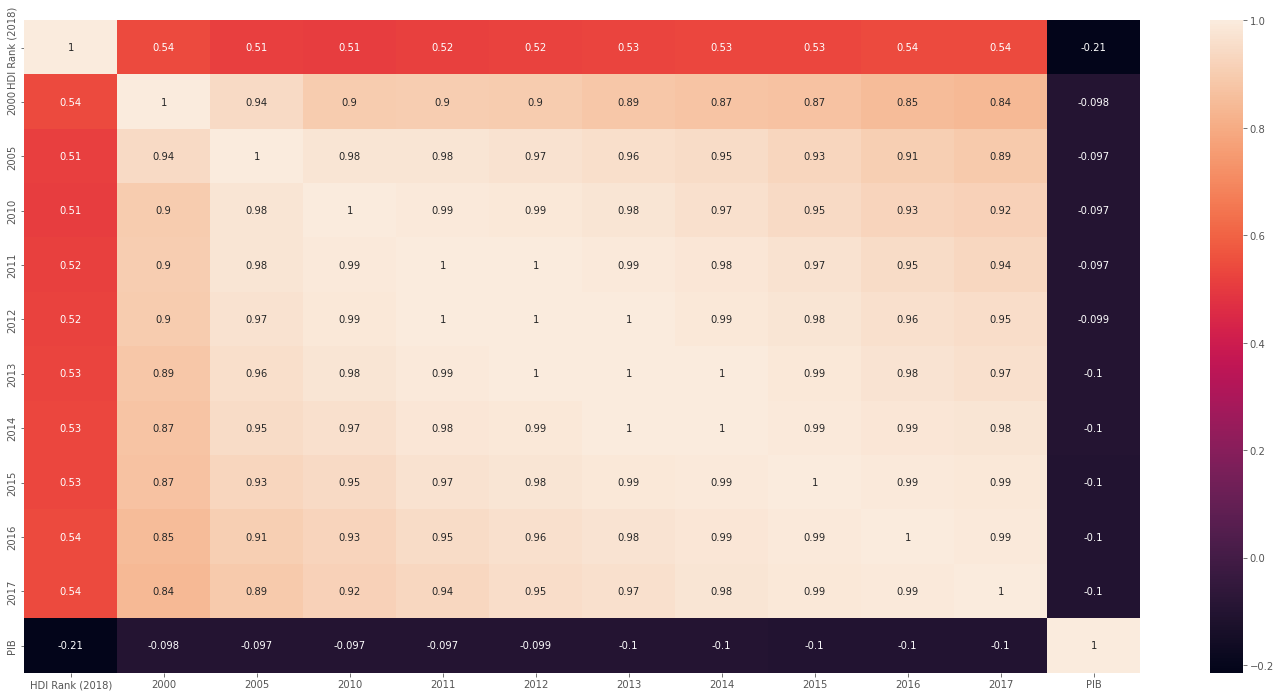

In [ ]:
corrMatrix = TxCcopy_df.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

En un primer momento, se quería escoger el año con correlación menor respecto al HDI y el PIB, se considerará la media de los años.

In [ ]:
#Estadísticos descriptivos de la correlación entre cada columna
corrMatrix.describe()

,HDI Rank (2018),2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,PIB
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.505674,0.783601,0.827997,0.834260,0.843641,0.846903,0.847861,0.845550,0.841146,0.832320,0.825510,-0.017334
std,0.264340,0.298879,0.318769,0.322055,0.324814,0.325836,0.326428,0.325330,0.323648,0.320613,0.317878,0.322075
min,-0.214094,-0.098011,-0.097007,-0.097260,-0.097090,-0.098717,-0.100106,-0.100051,-0.100667,-0.102967,-0.102035,-0.214094
25%,0.516943,0.848909,0.905245,0.912600,0.928190,0.939288,0.942385,0.930336,0.916922,0.894555,0.880979,-0.101009
50%,0.529710,0.879679,0.947018,0.956437,0.973643,0.975302,0.978482,0.980353,0.974337,0.956069,0.945359,-0.099384
75%,0.540402,0.899551,0.972470,0.982711,0.993388,0.992078,0.993845,0.991259,0.990362,0.987425,0.979735,-0.097218
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Elección del número de clústeres

Una vez determinadas las variables a estudiar, procedemos a la elección de npumero de clústers a través de varios métodos:


1.   Curva de codo
2.   Estadístido Gap
3.   Análisis de silueta



In [ ]:
TxCcopy_df

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,Continent,PIB
0,170.0,Afghanistan,190.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000,Asia,19291.0
1,69.0,Albania,22.000000,19.000000,17.000000,17.000000,16.000000,19.000000,16.000000,16.000000,16.00000,20.000000,Europe,15279.0
2,82.0,Algeria,74.000000,80.000000,77.000000,73.000000,73.000000,67.000000,72.000000,74.000000,70.00000,70.000000,Africa,171091.0
3,36.0,Andorra,21.000000,15.000000,9.500000,4.100000,13.000000,7.100000,8.700000,5.900000,6.00000,1.500000,Europe,3154.0
4,149.0,Angola,297.000000,368.000000,384.000000,383.000000,380.000000,376.000000,370.000000,366.000000,362.00000,359.000000,Africa,88815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,118.0,Viet Nam,197.000000,176.000000,155.000000,151.000000,147.000000,144.000000,140.000000,137.000000,133.00000,129.000000,Asia,261921.0
189,177.0,Yemen,116.000000,80.000000,52.000000,50.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,Asia,22581.0
190,143.0,Zambia,759.000000,602.000000,495.000000,475.000000,456.000000,437.000000,406.000000,391.000000,376.00000,361.000000,Africa,23309.0
191,150.0,Zimbabwe,605.000000,588.000000,416.000000,384.000000,355.000000,304.000000,278.000000,242.000000,233.00000,221.000000,Africa,21440.0


In [ ]:
#Se mezclan los datos para que no haya sesgo
TxCcopy_df = TxCcopy_df.sample(frac=1).reset_index(drop=True) 

In [ ]:
B=TxCcopy_df.copy()
#hago una copia de la copia, por si las dudas
Columns_nee=B[[	"2000",	"2005",	"2010"	,"2011"	,"2012",	"2013",	"2014",	"2015",	"2016",	"2017"]]
#saco las columnas que necesito

In [ ]:
#hallo la traspuesta de la columna
Tras_df=Columns_nee.transpose()


In [ ]:
Tras_df

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
2000,12.0,5.3,39.0,276.0,605.0,96.0,91.0,81.0,39.0,241.0,...,46.0,186.0,99.0,3.2,23.0,42.0,166.0,285.0,185.0,513.0
2005,15.0,3.9,36.0,233.0,588.0,72.0,106.0,267.0,29.0,224.0,...,125.0,153.0,120.0,1.0,21.0,28.0,186.0,285.0,191.0,513.0
2010,14.0,7.9,33.0,210.0,416.0,50.0,80.0,460.0,22.0,181.0,...,34.0,132.0,97.0,0.9,21.0,18.0,145.0,286.0,178.0,513.0
2011,15.0,2.8,34.0,207.0,384.0,47.0,92.0,331.0,22.0,176.0,...,56.0,131.0,93.0,1.0,21.0,17.0,135.0,286.0,176.0,513.0
2012,14.0,3.5,34.0,205.0,355.0,53.0,82.0,344.0,18.0,172.0,...,65.0,123.0,89.0,0.9,21.0,14.0,120.0,286.0,175.0,513.0
2013,13.0,3.9,34.0,203.0,304.0,49.0,80.0,353.0,17.0,170.0,...,75.0,122.0,86.0,1.1,21.0,14.0,104.0,285.0,173.0,513.0
2014,11.0,2.8,35.0,202.0,278.0,42.0,75.0,336.0,23.0,167.0,...,83.0,121.0,82.0,1.2,21.0,13.0,91.0,274.0,174.0,513.0
2015,10.0,2.4,35.0,202.0,242.0,40.0,89.0,326.0,19.0,163.0,...,102.0,119.0,79.0,1.1,21.0,13.0,80.0,274.0,174.0,513.0
2016,9.9,2.1,35.0,201.0,233.0,37.0,84.0,422.0,21.0,160.0,...,101.0,117.0,76.0,1.0,22.0,12.0,72.0,270.0,174.0,513.0
2017,8.9,4.5,35.0,201.0,221.0,32.0,76.0,480.0,19.0,156.0,...,91.0,116.0,73.0,1.0,22.0,10.0,66.0,266.0,174.0,513.0


In [ ]:
TxCcopy_3D = pd.DataFrame()
TxCcopy_3D['HDI Rank (2018)'] = TxCcopy_df[['HDI Rank (2018)']]

TxCcopy_3D["Mean Years"] =Tras_df.mean()
#meto la media de los paises por año

TxCcopy_3D['PIB']=TxCcopy_df['PIB']

In [ ]:
TxCcopy_3D

,HDI Rank (2018),Mean Years,PIB
0,15.000,12.28,2.829108e+06
1,6.000,3.91,2.418800e+04
2,156.000,35.00,1.165000e+03
3,159.000,214.00,3.516500e+04
4,150.000,362.60,2.144000e+04
...,...,...,...
188,46.000,18.10,6.075200e+04
189,50.000,116.50,1.816650e+05
190,94.465,279.70,9.170000e+02
191,174.000,177.40,1.826000e+03


In [ ]:
TxCcopy_df

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,Continent,PIB
0,15.000,United Kingdom,12.0,15.0,14.0,15.0,14.0,13.0,11.0,10.0,9.9,8.9,Europe,2.829108e+06
1,6.000,Iceland,5.3,3.9,7.9,2.8,3.5,3.9,2.8,2.4,2.1,4.5,Europe,2.418800e+04
2,156.000,Comoros,39.0,36.0,33.0,34.0,34.0,34.0,35.0,35.0,35.0,35.0,Africa,1.165000e+03
3,159.000,Uganda,276.0,233.0,210.0,207.0,205.0,203.0,202.0,202.0,201.0,201.0,Africa,3.516500e+04
4,150.000,Zimbabwe,605.0,588.0,416.0,384.0,355.0,304.0,278.0,242.0,233.0,221.0,Africa,2.144000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,46.000,Croatia,42.0,28.0,18.0,17.0,14.0,14.0,13.0,13.0,12.0,10.0,Europe,6.075200e+04
189,50.000,Kazakhstan,166.0,186.0,145.0,135.0,120.0,104.0,91.0,80.0,72.0,66.0,Asia,1.816650e+05
190,94.465,Somalia,285.0,285.0,286.0,286.0,286.0,285.0,274.0,274.0,270.0,266.0,Africa,9.170000e+02
191,174.000,Gambia,185.0,191.0,178.0,176.0,175.0,173.0,174.0,174.0,174.0,174.0,Africa,1.826000e+03


In [ ]:

#se gusrdan los nombres de los continentes
TxCcopy_3D_labels = TxCcopy_df['Continent']


In [ ]:
#Se normalizan los datos y se guardan en una variable diferente 
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

TxCcopy_3D_norm = minmax_norm(TxCcopy_3D)

In [ ]:
#Se visulalizan las 3 variables coloreadas por continente 
fig = px.scatter_3d(TxCcopy_df, x="HDI Rank (2018)", y="2013", z="PIB", 
                    #Las variables y y z se reescalan usando log ya que hay datos muy atípicos, al reesclar no se pierde información
                    log_z= True, log_y= True, 
                    size_max= 10,
                    size = [5 for i in range(TxCcopy_df.shape[0])],
                    color="Continent")
fig.show()

## Curva de codo

Este método usa la inercia como una medida de la variación intra-cluster e intenta minimizarla. La inercia es la suma de las distancias cuadráticas de las muestras al centro del cluster mas cercano.

Se debe tener en cuenta que la inercia óptima (mínima) sería cero, para el caso donde cada observación es su propio cluster; pero como esto no es de mucha utilidad, el métod del codo escoge como óptimo aquel valor del número de clusters a partir del cual añadir mas clusters solo consigue una mejora mínima de la inercia.

In [ ]:
def elbow_curve(data, maxClusters = 15):

  # rango de valores del parámetro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)
  inertias = []

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(data)
    inertias.append(kmeanModel.inertia_)

  # Grafico de los resultados obtenidos para cada valor del rango
  print("Valores: ",inertias)
  plt.figure(figsize=(10, 8))
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

Valores:  [23.38697962854924, 9.65900509822023, 6.810429539504764, 4.691851753460028, 3.4459098660246656, 2.7631507516180847, 2.3365734916218415, 2.011242208399634, 1.706297943964779, 1.537090847695632]


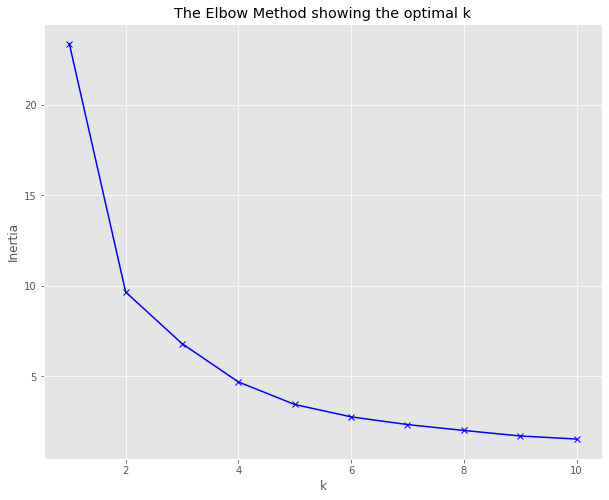

In [ ]:
elbow_curve(TxCcopy_3D_norm, maxClusters = 10)

Observando la curva, podemos decir que el codo está entre 4 y 5 ya que el cambio de 5 a 6 es muy pequeño para considerarlo.

## Estadístico Gap

El objetivo de este método es definir un procedimiento estadístico para formalizar la heurística de la curva de codo. De forma muy simplificada, el estadístico de gap compara, para diferentes valores de k, la variación total intracluster observada frente al valor esperado acorde a una distribución uniforme de referencia (datos de referencia). La elección óptima de K viene dada por k para la que la brecha entre los dos resultados es máxima

In [ ]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def optimalK(data, nrefs=3, maxClusters=15):

    gaps = np.zeros((len(range(1, maxClusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        # guardara los resultados de dispersión de cada distribución simulada
        refDisps = np.zeros(nrefs)

        # Genera las muestras aleatorias indicadas con nrefs y ejecuta k-means
        # en cada bucle obteniendo los resultados de dispersión (inercia)
        # para cada conjunto generado.
        for i in range(nrefs):
            
            # Crea nuevo conjunto aleatorio de referencia
            # Se puede usar una semilla para tener reproducibilidad
            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)
            
            # se ajusta el modelo al conjunto de referencia
            km = KMeans(k)
            km.fit(randomReference)
            # se guarda la dispersión obtenida
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Se ajusta el modelo a los datos originales y se guarda su inercia
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calcula el estadístico de gap para k clusters usando el promedio de
        # las dispersiones de los datos simulados y la dispersión de los datos originales.
        gap = np.mean(np.log(refDisps)) - np.log(origDisp)

        # Guarda el estadístico de gap obtenido en este bucle.
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    # Selecciona el "primer máximo" de los estadísticos obtenidos y devuelve 
    # su respectivo número de clusters    
    for i in range(0, len(gaps)-1):
      if gaps[i+1] <= gaps[i]:
        return (i+1, resultsdf)
    return (len(gaps), resultsdf)
    #return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [ ]:
k, gapdf = optimalK(TxCcopy_3D_norm, nrefs=5, maxClusters=15)
print('La cantidad óptima de clusters es: ', k)

La cantidad óptima de clusters es:  15


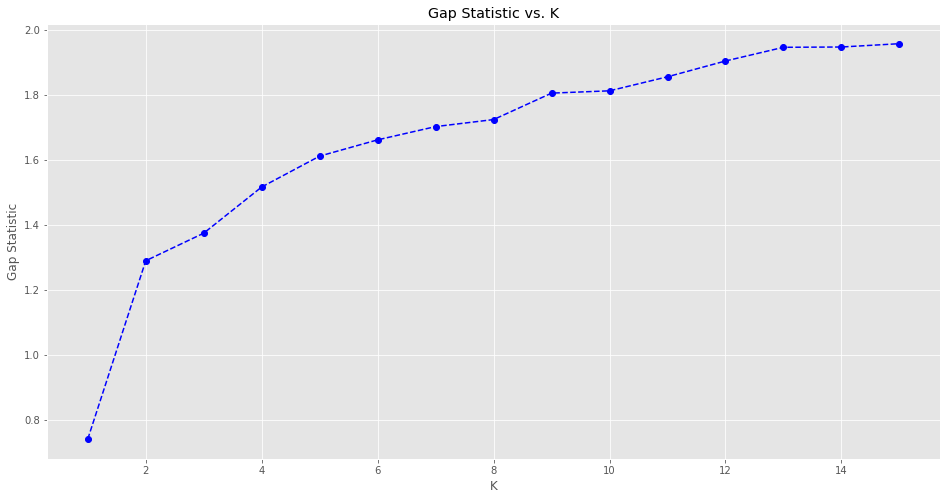

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(gapdf['clusterCount'], gapdf['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

Dado los resultados de este método, al ser tan diferentes con los otros dos concluimos que no será útil para el análisis que buscamos. Un valor tan alto del número de clústeres según el estadístico de gap puede indicar que no parece que hayan buenos agrupamientos dentro de los datos, al menos estadísticamente.

## Coeficiente de Silueta

El Coeficiente de Silueta es una medida de la similitud de una observación con su propio clúster en comparación con otros clústeres. La silueta oscila entre -1 y +1, donde un valor alto indica que el objeto está bien emparejado con su propio clúster y mal emparejado con los clústeres vecinos. Si la mayoría de los objetos tienen un valor alto, la configuración de la agrupación es adecuada. Si muchos puntos tienen un valor bajo o negativo, entonces la configuración de clustering puede tener demasiados o muy pocos clusters.

For n_clusters = 2 The average silhouette_score is : 0.5209781506028143
For n_clusters = 3 The average silhouette_score is : 0.44377236436441836
For n_clusters = 4 The average silhouette_score is : 0.46955171256376127
For n_clusters = 5 The average silhouette_score is : 0.4865463342956237
For n_clusters = 6 The average silhouette_score is : 0.44421393343099946


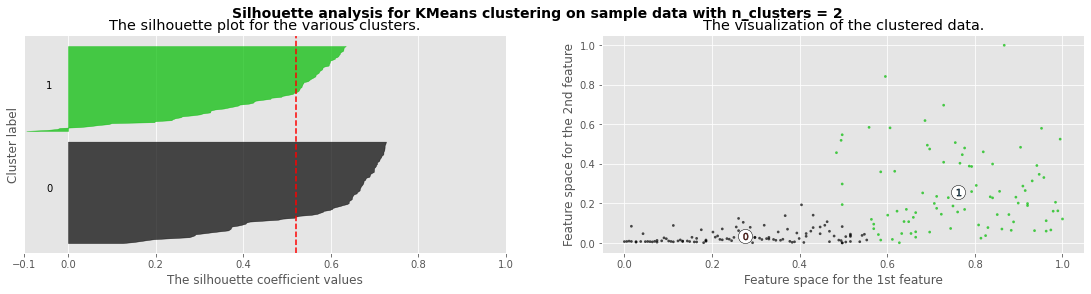

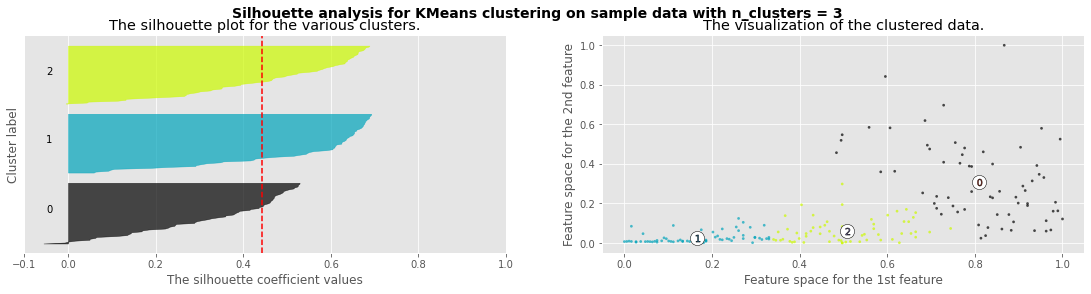

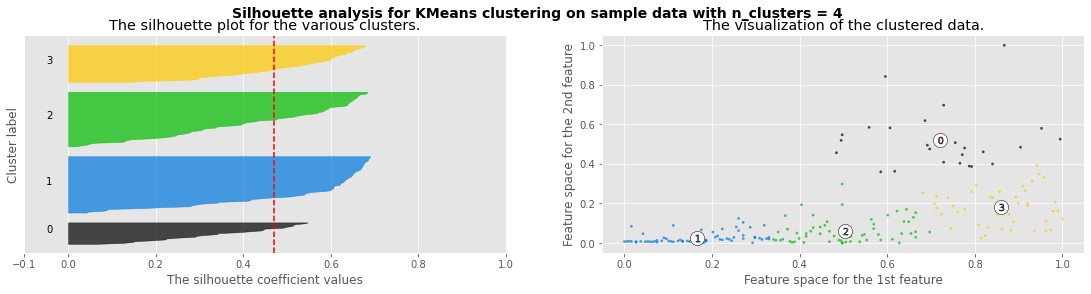

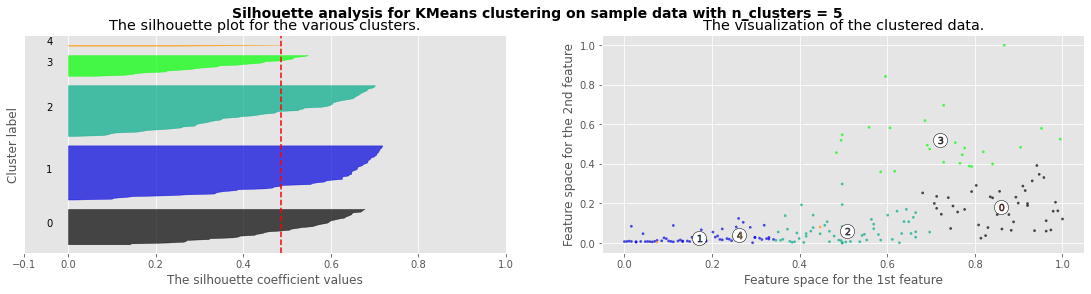

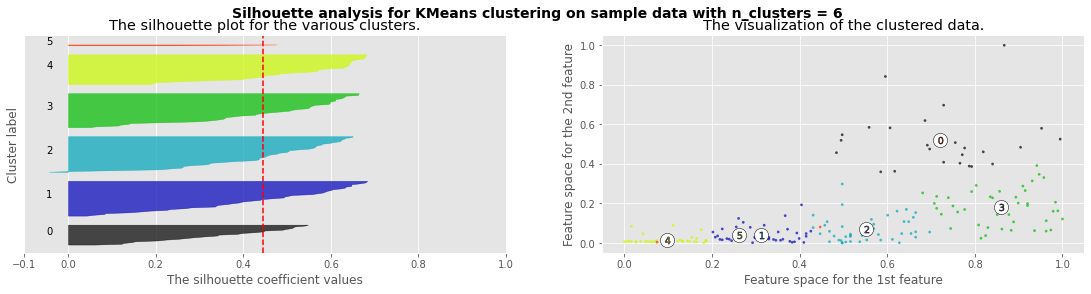

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

colors_k_means = ['cyan','purple','orange']
range_n_clusters = [2, 3, 4, 5, 6]
X = np.array(TxCcopy_3D_norm)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(19, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Según este método, deberíamos elegir un número de clústeres que resulte en un coeficiente de silueta alto. Para este caso, el mejor resultada se alcanza con 2 clústeres, pero esto lo consideramos una segmentación muy pequeña, es decir, muy general. Los siguientes $k$ que sugiere son 4 y 5, pero notamos que si escogiéramos 5, habría un clúster con muy pocas observaciones adentro.

# 5. Agrupamiento Jerárquico

Realizar un agrupamiento jerárquico de los datos a través de un dendograma y así decidir finalmente el número de clústeres que se van a tomar.

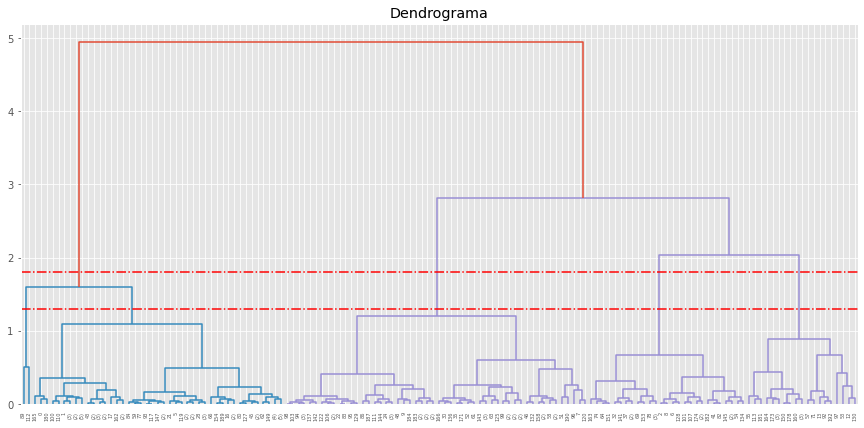

In [ ]:
plt.figure(figsize=(15, 7))  
plt.title("Dendrograma")
dend = shc.dendrogram(shc.linkage(TxCcopy_3D_norm, method='ward'),truncate_mode='level',p=7)

# Graficamos dos líneas de corte
# una para indicar 4 clústeres y otra 5
plt.axhline(y=1.8, color='r', linestyle='-.')
plt.axhline(y=1.3, color='r', linestyle='-.')

Teniendo en cuenta los resultados obtenidos por los métodos de la curva de codo y el coeficiente de la silueta es escogen 4 clústeres. El dendrograma muestra que si se escogiera 5 clústeres, habría uno con muy pocos mienbros, como también lo indicaba la gráfica de la silueta.

A continuación, realizamos el agrupamiento jerárquico con 4 clústeres.

In [ ]:
# Crear el modelo con la metrica euclidiana y vinculación minimizando la distancia.
model = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Aplicar el modelo
data_fit = model.fit(TxCcopy_3D_norm)
# Guardamos las etiquetas que indican a qué clúster pertenece cada observación
lab_c = data_fit.labels_

Ahora graficamos de nuevo las tres variables que se usaron para segmentar los datos, pero esta vez coloreadas de acuerdo a los clústeres obtenidos.

In [ ]:
TxCcopy_3D['Labels_Clusters']=lab_c.astype(str)

fig = px.scatter_3d(TxCcopy_3D, x="HDI Rank (2018)", y="Mean Years", z="PIB", 
                    log_z= True, log_y= True, 
                    size_max= 10,
                    size = [5 for i in range(TxCcopy_df.shape[0])],
                    color="Labels_Clusters")
fig.show()

# 6. Análisis de cada clúster

In [ ]:
# Agregamos los continentes para poder hacer el análisis por continente dentro de cada clúster
TxCcopy_3D["Continentes"] = TxCcopy_3D_labels

In [ ]:
TxCcopy_df.describe().round(2)

,HDI Rank (2018),2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,PIB
count,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00
mean,94.47,148.45,148.58,135.48,129.78,126.34,123.00,118.78,116.02,113.69,109.70,452304.07
std,53.92,195.61,206.28,188.87,177.60,169.59,163.56,156.56,152.25,146.73,141.52,1935024.15
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.00
25%,49.00,22.00,17.00,16.00,16.00,14.00,13.00,14.00,13.00,12.00,12.00,8454.00
50%,94.46,66.00,66.00,53.00,55.00,53.00,54.00,53.00,51.00,49.00,47.00,38145.00
75%,140.00,216.00,192.00,178.00,162.00,172.00,168.00,162.00,159.00,160.00,152.00,250077.00
max,189.00,1070.00,1280.00,1120.00,1050.00,985.00,916.00,852.00,788.00,724.00,665.00,21433226.00


In [ ]:
#paises por continente en el dataframe original
TxCcopy_df.groupby("Continent").size()

Continent
Africa           53
Asia             49
Europe           42
North America    23
Oceania          14
South America    12
dtype: int64

## Clúster 0:

In [ ]:
#mostrar las estadisticas del clouster 0
group_referrer_index = TxCcopy_3D['Labels_Clusters'] == '0'
group_referrals = TxCcopy_df[group_referrer_index]
group_referrals.describe().round(2)

,HDI Rank (2018),2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,PIB
count,71.00,71.00,71.00,71.00,71.0,71.00,71.00,71.00,71.00,71.00,71.00,71.00
mean,35.99,35.33,30.91,27.80,26.4,25.54,24.70,23.76,22.80,23.20,22.01,1024855.89
std,21.06,34.52,33.58,30.15,28.1,26.70,25.28,24.79,23.74,25.41,23.87,3087240.93
min,1.00,1.30,2.60,1.80,0.0,1.00,1.00,0.80,0.00,0.80,0.00,268.00
25%,18.50,12.00,8.80,7.90,7.4,7.50,7.20,6.80,6.95,6.85,6.50,52824.50
50%,36.00,22.00,17.00,17.00,16.0,14.00,14.00,13.00,13.00,12.00,12.00,209852.00
75%,52.00,47.50,38.00,32.50,28.0,26.00,30.00,24.50,25.00,26.50,26.00,531990.00
max,85.00,166.00,186.00,145.00,135.0,120.00,104.00,92.00,88.00,123.00,106.00,21433226.00


**Caracterización:** <br>
El PIB de este clúster es en promedio mucho más alto que el del resto de clústeres, pero existe una muy significativa desigualdad entre algunos países dada su alta varianza de 3087240 lo cual puede significar datos atípicos. Esto también se evidencia por la gran diferencia que existe entre $q_{0.75}$ y el máximo de21433226.<br>
En este clúster se encuentra el país con el mejor ranking HDI, equivalente a 1 , y en promedio, todos los países de este clúster tienen mejor HDI que los países de otros clústeres, equivalente a 35.99.<br>
También resulta que los países de este clúster en promedio tienen un índice de ocurrencia de tuberculosis muy baja en todos los años estudiados a comparación con el promedio mundial y el de los otros clústeres.


In [ ]:
#Mostrar la tablita comn datos especificos
group_referrals.groupby('Continent') \
               .agg(count=('HDI Rank (2018)', 'size'),
                    mean_2013=('2013', 'mean'),
                    mean_PIB=('PIB', 'mean'),
                    max_HDI=('HDI Rank (2018)', 'max'),
                    min_HDI=('HDI Rank (2018)', 'min')) \
               .reset_index() \
               .round(3)

,Continent,count,mean_2013,mean_PIB,max_HDI,min_HDI
0,Africa,2,21.500,7875.500,66.0,62.0
1,Asia,19,40.084,1350765.263,85.0,4.0
2,Europe,37,19.537,577178.324,69.0,1.0
3,North America,7,14.171,3334472.571,68.0,13.0
4,Oceania,3,19.033,534587.667,55.0,6.0
5,South America,3,23.333,261269.333,57.0,42.0


De la tabla anterior podemos leer que la mayor cantidad de países de Europa se encuentra en este clúster con un total de 37. Esto puede explicar por qué en promedio es el clúster con menor incidencia de tuberculosis y gran PIB.

También hay una cantidad considerable de países de Asia, equivalente a 19.

## Clúster 1:

In [ ]:
#mostrar las estadisticas del clouster 1
group_referrer_index = TxCcopy_3D['Labels_Clusters'] == '1'
group_referrals = TxCcopy_df[group_referrer_index]
group_referrals.describe().round(2)

,HDI Rank (2018),2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,PIB
count,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00
mean,138.28,570.91,610.30,549.61,526.09,503.87,486.13,464.22,452.74,432.74,411.39,82906.91
std,26.56,219.36,223.79,209.78,179.32,161.31,149.30,141.05,130.98,118.84,114.04,163491.17
min,92.00,153.91,368.00,348.00,380.00,355.00,304.00,278.00,242.00,233.00,221.00,194.00
25%,122.50,430.00,472.50,427.00,406.00,394.00,391.00,378.00,367.00,346.50,322.50,3897.50
50%,143.00,515.00,523.00,498.00,480.00,456.00,441.00,428.00,404.00,407.00,413.00,16874.00
75%,152.50,692.00,658.50,552.00,541.50,544.50,530.50,526.00,525.00,523.00,505.50,69631.00
max,188.00,1070.00,1280.00,1120.00,1050.00,985.00,916.00,852.00,788.00,724.00,665.00,671155.83


**Caracterización:** <br>
El PIB de este clúster es en promedio es el segundo más bajo que el del resto de clústeres, equivalente a 82906.91, y existe una muy significativa desigualdad entre algunos países dada su alta varianza equivalente a 163491.17 lo cual puede significar datos dispersos. Esto también se evidencia por la gran diferencia que existe entre $q_{0.75}$ y el máximo.<br>
En promedio, todos los países de este clúster tienen un mal HDI, equivalente a 138.28, comparado con los países de otros clústeres.<br>
También resulta que los países de este clúster en promedio tienen el índice de ocurrencia de tuberculosis más alarmantemente alto en todos los años estudiados a comparación con el promedio mundial y el de los otros clústeres.


In [ ]:
#Mostrar la tablita comn datos especificos
group_referrals.groupby('Continent') \
               .agg(count=('HDI Rank (2018)', 'size'),
                    mean_2013=('2013', 'mean'),
                    mean_PIB=('PIB', 'mean'),
                    max_HDI=('HDI Rank (2018)', 'max'),
                    min_HDI=('HDI Rank (2018)', 'min')) \
               .reset_index() \
               .round(3)

,Continent,count,mean_2013,mean_PIB,max_HDI,min_HDI
0,Africa,15,501.667,47646.533,188.0,94.0
1,Asia,6,459.167,194522.972,146.0,92.0
2,Oceania,2,450.500,12511.500,155.0,132.0


La mayoría de países de este clúster pertenecen a África, con un número de 15. Esto puede ayudar a explicar por qué es el clúster con mayor incidencia de tuberculosis.

## Clúster 2: 

In [ ]:
#mostrar las estadisticas del clouster 2
group_referrer_index = TxCcopy_3D['Labels_Clusters'] == '2'
group_referrals = TxCcopy_df[group_referrer_index]
group_referrals.describe().round(2)

,HDI Rank (2018),2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,PIB
count,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00
mean,105.26,96.42,93.30,88.43,84.63,84.68,83.75,82.14,80.73,81.95,80.65,169640.99
std,21.18,92.43,86.79,90.48,82.17,81.77,81.65,80.23,78.04,84.25,86.86,455147.09
min,70.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.00
25%,89.00,26.00,21.00,24.00,23.00,27.50,24.00,22.50,23.00,23.00,23.50,2051.50
50%,103.00,68.00,68.00,50.00,54.00,52.00,54.00,53.00,50.00,48.00,45.00,18173.00
75%,122.50,141.50,153.00,130.50,131.00,125.50,132.50,129.50,121.50,125.00,117.00,94482.00
max,147.00,370.00,360.00,460.00,338.00,344.00,353.00,336.00,326.00,422.00,480.00,2868929.00


**Caracterización:** <br>
El PIB de este clúster es en promedio el segundo más alto comparado con el resto de clústeres, equivalente a 169640.99, aunque la diferencia con el primero sigue siendo muy grande. De igual forma existe una gran varianza en este valor dentro del clúster, equivalente a 455147.09. Esto también se evidencia por la diferencia que existe entre $q_{0.75}$(94482.00) y el máximo el cual equivale 2868929.00.<br>
El HDI promedio de este clúster es muy alto, pero sigue estando casi en la media, este equivale a 105.26. El mejor ranking es 70 y el peor 147.<br>
El índice de ocurrencia de tuberculosis dentro de este clúster también es considerablemente bajo en comparación con el clúster 1 y 3.

In [ ]:
#Mostrar la tablita comn datos especificos
group_referrals.groupby('Continent') \
               .agg(count=('HDI Rank (2018)', 'size'),
                    mean_2013=('2013', 'mean'),
                    mean_PIB=('PIB', 'mean'),
                    max_HDI=('HDI Rank (2018)', 'max'),
                    min_HDI=('HDI Rank (2018)', 'min')) \
               .reset_index() \
               .round(3)

,Continent,count,mean_2013,mean_PIB,max_HDI,min_HDI
0,Africa,10,114.300,76609.500,144.0,82.000
1,Asia,20,119.065,284723.000,147.0,70.000
2,Europe,5,53.520,38951.200,107.0,75.000
3,North America,15,21.687,108331.333,132.0,72.000
4,Oceania,8,115.125,1072.625,141.0,94.465
5,South America,9,63.667,341898.222,123.0,79.000


La mayor cantidad de países de Suramérica se encuentra en este clúster, equivalen a 9. También contiene una porción considerable de Norte América y Asia, los cuales son 15 y 20 respectivamente.  Cabe aclarar que en esta base de datos se consideran los países de Centro América como Norte América, por eso hipotetizamos que en este clúster se encuentran países en vía de desarrollo pero índices de probreza no tan bajo, lo que se refleja en el HDI ya analizado.

## Clúster 3:

In [ ]:
#mostrar las estadisticas del clouster 3
group_referrer_index = TxCcopy_3D['Labels_Clusters'] == '3'
group_referrals = TxCcopy_df[group_referrer_index]
group_referrals.describe().round(2)

,HDI Rank (2018),2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,PIB
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,170.12,204.75,193.50,175.25,168.84,165.88,162.28,158.06,154.72,151.59,148.25,39284.78
std,11.55,105.45,104.15,100.10,96.91,97.13,96.71,94.25,94.26,93.92,94.64,89693.10
min,150.00,39.00,29.00,22.00,22.00,18.00,17.00,23.00,19.00,21.00,19.00,1165.00
25%,160.50,110.75,104.50,81.50,88.75,79.25,76.00,72.00,67.50,70.75,64.75,5147.75
50%,171.00,205.00,190.00,164.50,148.50,148.50,148.50,152.50,149.00,149.50,138.50,13512.50
75%,179.50,290.75,273.00,262.00,241.25,236.75,226.25,219.25,204.50,201.50,195.75,25311.75
max,189.00,421.00,397.00,372.00,376.00,382.00,387.00,369.00,373.00,374.00,374.00,448120.00


**Caracterización:** <br>
El PIB de este clúster es el más bajo con respecto a los otros clústeres aunque, este equivale a 39284.78. Existe una muy significativa desigualdad entre algunos países dada su alta varianza lo cual puede significar datos dispersos. Al menos el 75% de los países de este clúster tiene un PIB entre 1165.00 y 25311.75, a pesar de que el promedio es aproximadamente 39284.78.<br>
En promedio, los países de este clúster tienen el peor HDI,equivalente a 170.12, pues sus rankings van desde 150 a 189. 189 es el último lugar de este ranking.<br>
También resulta que los países de este clúster en promedio tienen el segundo índice de ocurrencia de tuberculosis más alto aunque existe una diferencia considerable con respecto al clúster 1.

El clúster 1 y 3 son los más similares según las características que se usaron para hacer el agrupamiento.

In [ ]:
#Mostrar la tablita comn datos especificos
group_referrals.groupby('Continent') \
               .agg(count=('HDI Rank (2018)', 'size'),
                    mean_2013=('2013', 'mean'),
                    mean_PIB=('PIB', 'mean'),
                    max_HDI=('HDI Rank (2018)', 'max'),
                    min_HDI=('HDI Rank (2018)', 'min')) \
               .reset_index() \
               .round(3)

,Continent,count,mean_2013,mean_PIB,max_HDI,min_HDI
0,Africa,26,168.385,33872.846,189.0,150.0
1,Asia,4,132.250,90124.500,177.0,152.0
2,North America,1,206.000,14332.000,169.0,169.0
3,Oceania,1,80.000,1589.000,153.0,153.0


La mayor cantidad de países de África se encuentra en este clúster, equivalente a 26. Esto puede ayudar a explicar por qué es el clúster con segundo mayor incidencia de tuberculosis.

# 7. Análisis de Tendencias y Conclusiones

#### **1.** Si escogiéramos 5 clústeres, uno de ellos contendría a los países con medidas atípicas en alguna de sus características. Estos resultan ser China y E.E.U.U., debido a su desmesurado PIB.

In [ ]:
TxCcopy_df[(TxCcopy_df["Country"] == "China") | (TxCcopy_df["Country"] == "United States")]

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,Continent,PIB
89,15.0,United States,6.7,5.5,4.2,3.9,3.7,3.3,3.2,3.3,3.1,3.1,North America,21433226.0
112,85.0,China,109.0,92.0,77.0,76.0,74.0,70.0,68.0,66.0,64.0,63.0,Asia,14279937.0


In [ ]:
TxCcopy_3D1 = pd.DataFrame()
TxCcopy_3D1['HDI Rank (2018)'] = TxCcopy_df[['HDI Rank (2018)']]

TxCcopy_3D1["Mean Years"] =Tras_df.mean()
#meto la media de los paises por año

TxCcopy_3D1['PIB']=TxCcopy_df['PIB']

TxCcopy_3D_norm1 = minmax_norm(TxCcopy_3D1)

# Crear el modelo con la metrica euclidiana y vinculación minimizando la distancia.
model = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Aplicar el modelo
data_fit = model.fit(TxCcopy_3D_norm1)
# Guardamos las etiquetas que indican a qué clúster pertenece cada observación
lab_c = data_fit.labels_

TxCcopy_3D1['Labels_Clusters']=lab_c.astype(str)

fig = px.scatter_3d(TxCcopy_3D1, x="HDI Rank (2018)", y="Mean Years", z="PIB", 
                    log_z= True, log_y= True, 
                    size_max= 10,
                    size = [5 for i in range(TxCcopy_df.shape[0])],
                    color="Labels_Clusters")
fig.show()

#### **2.** Si escogiéramos 3 clústeres:

In [ ]:
TxCcopy_3D2 = pd.DataFrame()
TxCcopy_3D2['HDI Rank (2018)'] = TxCcopy_df[['HDI Rank (2018)']]

TxCcopy_3D2["Mean Years"] =Tras_df.mean()
#meto la media de los paises por año

TxCcopy_3D2['PIB']=TxCcopy_df['PIB']

TxCcopy_3D_norm2 = minmax_norm(TxCcopy_3D2)

# Crear el modelo con la metrica euclidiana y vinculación minimizando la distancia.
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Aplicar el modelo
data_fit = model.fit(TxCcopy_3D_norm2)
# Guardamos las etiquetas que indican a qué clúster pertenece cada observación
lab_c = data_fit.labels_

TxCcopy_3D2['Labels_Clusters']=lab_c.astype(str)

fig = px.scatter_3d(TxCcopy_3D2, x="HDI Rank (2018)", y="Mean Years", z="PIB", 
                    log_z= True, log_y= True, 
                    size_max= 10,
                    size = [5 for i in range(TxCcopy_df.shape[0])],
                    color="Labels_Clusters")
fig.show()

In [ ]:
#mostrar las estadisticas del nuevo clouster 0
group_referrer_index = TxCcopy_3D2['Labels_Clusters'] == '0'
group_referrals = TxCcopy_df[group_referrer_index]
group_referrals.describe().round(2)

,HDI Rank (2018),2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,PIB
count,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00
mean,156.81,357.87,367.80,331.80,318.24,307.22,297.71,286.09,279.35,269.16,258.29,57526.76
std,24.80,243.33,263.97,241.68,223.87,210.54,201.10,190.87,184.66,174.37,166.13,126410.60
min,92.00,39.00,29.00,22.00,22.00,18.00,17.00,23.00,19.00,21.00,19.00,194.00
25%,146.50,181.00,166.00,140.00,137.00,134.50,132.00,130.00,126.00,120.00,118.00,4296.00
50%,161.00,305.00,316.00,293.00,299.00,294.00,275.00,270.00,242.00,237.00,238.00,14332.00
75%,175.00,508.00,510.50,434.00,430.00,430.00,430.00,398.00,385.50,375.00,367.50,32839.00
max,189.00,1070.00,1280.00,1120.00,1050.00,985.00,916.00,852.00,788.00,724.00,665.00,671155.83


In [ ]:
#Mostrar la tablita comn datos especificos
group_referrals.groupby('Continent') \
               .agg(count=('HDI Rank (2018)', 'size'),
                    mean_2013=('2013', 'mean'),
                    mean_PIB=('PIB', 'mean'),
                    max_HDI=('HDI Rank (2018)', 'max'),
                    min_HDI=('HDI Rank (2018)', 'min')) \
               .reset_index() \
               .round(3)

,Continent,count,mean_2013,mean_PIB,max_HDI,min_HDI
0,Africa,41,290.317,38912.000,189.0,94.0
1,Asia,10,328.400,152763.583,177.0,92.0
2,North America,1,206.000,14332.000,169.0,169.0
3,Oceania,3,327.000,8870.667,155.0,132.0


Si decidiéramos agrupar los datos en 3 clústeres, veríamos un cambio muy interesante con respecto a los 4 con los que se trabajó: el clúster de los países desarrollados (en su mayoría Europeos) aún se mantiene, el clúster de los países en vía de desarrollo con HDI moderado (en su mayoría países de Latinoamérica) aún se mantiene, y los dos clústeres que contenían más países de África se fucionan, este último tiene 41 países de África y un índice de incidencia de tuberculosis bastante alto.

#### **3.** Clúster 1 y 3:

En nuestro análisis por clústeres, notamos que habían dos de estos grupos en los que dominaban los países de África, puntualmente los clústeres 1 y 3. Sin embargo, había una gran diferencia en el índice de incidencia de tuberculosis entre ambos clústeres. Por eso, nos preguntamos si esta diferencia se podía deber a algún factor externo, como por ejemplo la ubicación geográfica. En el siguiente mapa de África se pitan los países de acuerdo al clúster al que pertenecen.

In [ ]:
Africa_df=TxCcopy_3D[(TxCcopy_3D["Continentes"] == "Africa") ].sort_values(by=["Mean Years"], ascending=False)

In [ ]:
# En este dataset se presentan los países de África junto al clúster al que pertenecen
Africa_df

,HDI Rank (2018),Mean Years,PIB,Labels_Clusters,Continentes,Country
97,164.000,937.200000,2376.0,1,Africa,Lesotho
53,113.000,789.200000,351431.0,1,Africa,South Africa
130,138.000,653.100000,4471.0,1,Africa,Eswatini (Kingdom of)
12,130.000,580.200000,12366.0,1,Africa,Namibia
57,115.000,545.600000,16874.0,1,Africa,Gabon
181,180.000,543.500000,15291.0,1,Africa,Mozambique
113,188.000,492.300000,2220.0,1,Africa,Central African Republic
92,94.000,486.600000,1834.0,1,Africa,Botswana
160,143.000,475.800000,23309.0,1,Africa,Zambia
55,171.000,453.700000,3324.0,1,Africa,Djibouti


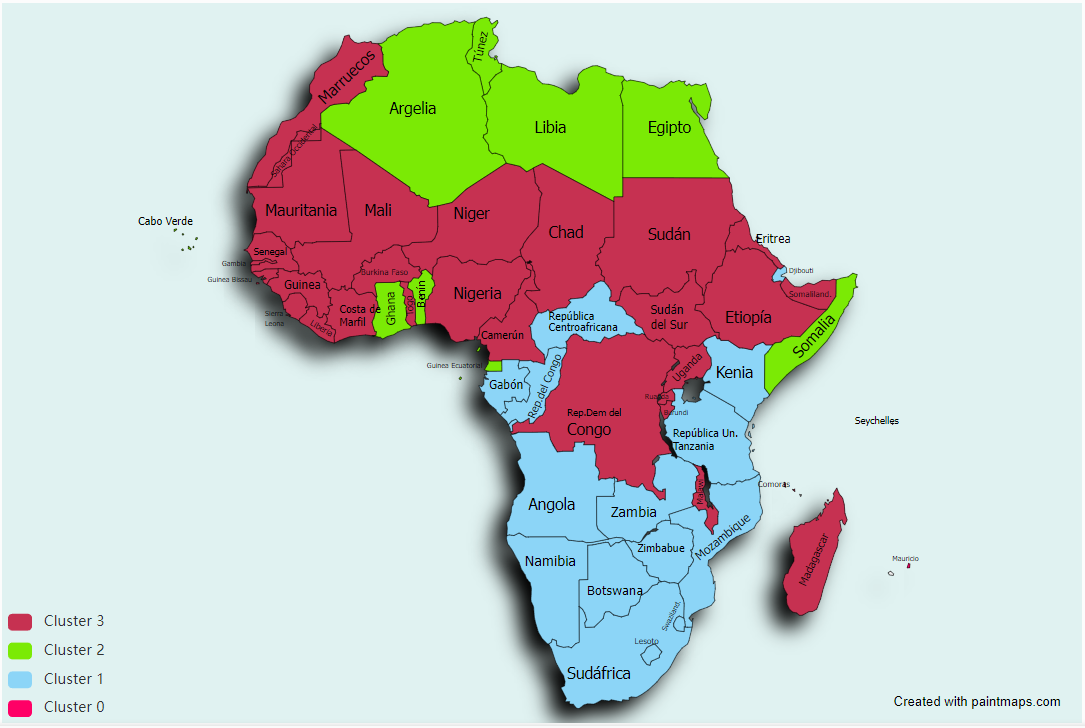

Los países al sur de Áfrican parecen ser los más afectados por tuberculosis.

#### **4.** Si escogiéramos aún más clústeres:

Si escogiéramos 6 clústeres, el siguiente clúster que se separaría en dos sería el identificado como clúster 2, el cual está compuesto en su mayoría a países de Latam y Asia.

In [ ]:
TxCcopy_3D3 = pd.DataFrame()
TxCcopy_3D3['HDI Rank (2018)'] = TxCcopy_df[['HDI Rank (2018)']]

TxCcopy_3D3["Mean Years"] =Tras_df.mean()
#meto la media de los paises por año

TxCcopy_3D3['PIB']=TxCcopy_df['PIB']

TxCcopy_3D_norm3 = minmax_norm(TxCcopy_3D3)

# Crear el modelo con la metrica euclidiana y vinculación minimizando la distancia.
model = AgglomerativeClustering(n_clusters=6, linkage='ward')

# Aplicar el modelo
data_fit = model.fit(TxCcopy_3D_norm3)
# Guardamos las etiquetas que indican a qué clúster pertenece cada observación
lab_c = data_fit.labels_

TxCcopy_3D3['Labels_Clusters']=lab_c.astype(str)

fig = px.scatter_3d(TxCcopy_3D3, x="HDI Rank (2018)", y="Mean Years", z="PIB", 
                    log_z= True, log_y= True, 
                    size_max= 10,
                    size = [5 for i in range(TxCcopy_df.shape[0])],
                    color="Labels_Clusters")
fig.show()

In [ ]:
group_referrer_index = TxCcopy_3D3['Labels_Clusters'] == '2'
group_referrals = TxCcopy_df[group_referrer_index]

#Mostrar la tablita comn datos especificos
group_referrals.groupby('Continent') \
               .agg(count=('HDI Rank (2018)', 'size'),
                    mean_2013=('2013', 'mean'),
                    mean_PIB=('PIB', 'mean'),
                    max_HDI=('HDI Rank (2018)', 'max'),
                    min_HDI=('HDI Rank (2018)', 'min')) \
               .reset_index() \
               .round(3)

,Continent,count,mean_2013,mean_PIB,max_HDI,min_HDI
0,Africa,8,130.250,69526.000,144.0,94.465
1,Asia,13,146.238,382275.462,147.0,108.000
2,Europe,1,127.000,11968.000,107.0,107.000
3,North America,4,43.000,35336.750,132.0,124.000
4,Oceania,5,159.800,491.000,141.0,94.465
5,South America,2,117.500,27613.500,123.0,114.000


El nuevo clúster 2 contiene más países de Asia que de Latam.

In [ ]:
group_referrer_index = TxCcopy_3D3['Labels_Clusters'] == '5'
group_referrals = TxCcopy_df[group_referrer_index]

#Mostrar la tablita comn datos especificos
group_referrals.groupby('Continent') \
               .agg(count=('HDI Rank (2018)', 'size'),
                    mean_2013=('2013', 'mean'),
                    mean_PIB=('PIB', 'mean'),
                    max_HDI=('HDI Rank (2018)', 'max'),
                    min_HDI=('HDI Rank (2018)', 'min')) \
               .reset_index() \
               .round(3)

,Continent,count,mean_2013,mean_PIB,max_HDI,min_HDI
0,Africa,2,50.500,104943.500,91.000,82.000
1,Asia,7,68.600,103554.143,104.000,70.000
2,Europe,4,35.150,45697.000,94.465,75.000
3,North America,11,13.936,134874.818,103.000,72.000
4,Oceania,3,40.667,2042.000,105.000,94.465
5,South America,7,48.286,431693.857,98.000,79.000


El nuevo clúster 5 contiene más países de Latam que de Asia.

**5.** Los países con menor PIB y menor índice de desarrollo humano son agrupados en el mismo clúster y presentan la incidencia de tuberculosis más alarmante. La mayoría de estos países corresponden a países de África y los correspondientes clústeres son el 1 y 3.

## Conclusiones

**1.** Como se había hipotetizado, Colombia pertenece al clúster 2, el cuál corresponde a países en vía de desarrollo cuyo índice de incidencia de tuberculosis no es alarmante en comparación con el de otros clústeres.

In [ ]:
TxCcopy_3D[TxCcopy_df["Country"] == "Colombia"]

,HDI Rank (2018),Mean Years,PIB,Labels_Clusters,Continentes
111,79.0,31.8,323615.0,2,South America


In [ ]:
TxCcopy_3D['Country']=TxCcopy_df["Country"]

**2.** Consentrándonos en Latinoamérica, podemos observar que la mayoría pertenece al clúster 2, la minoría al clúster 0 y solamente Haití al clúster 3. Esto ubica a Latinoamérica por debajo de Europa y por encima de África en cuanto a HDI, PIB y riesgo de tuberculosis.

In [ ]:
latam = TxCcopy_3D[((TxCcopy_3D["Continentes"] == "South America") | (TxCcopy_3D["Continentes"] == "North America")) & ((TxCcopy_3D["Country"] != "United States") & (TxCcopy_3D["Country"] != "Canada"))]
latam.sort_values("Labels_Clusters")

,HDI Rank (2018),Mean Years,PIB,Labels_Clusters,Continentes,Country
90,57.0,27.20,56045.0,0,South America,Uruguay
87,42.0,17.10,282318.0,0,South America,Chile
85,63.0,18.80,24269.0,0,North America,Trinidad and Tobago
79,68.0,12.92,61801.0,0,North America,Costa Rica
45,56.0,1.41,5209.0,0,North America,Barbados
138,60.0,16.58,13578.0,0,North America,Bahamas
149,67.0,52.30,66800.0,0,North America,Panama
28,48.0,26.60,445445.0,0,South America,Argentina
146,89.0,55.60,88941.0,2,North America,Dominican Republic
106,98.0,42.00,38145.0,2,South America,Paraguay


In [ ]:
# pequeña tabla con el número de países de Latam por clúster
latam.groupby("Labels_Clusters").size()

Labels_Clusters
0     8
2    24
3     1
dtype: int64

**3.** Los países que se consideran más desarrollados (mayor PIB y mejor HDI) como los europeos son en su mayoría agrupados dentro de un mismo clúster y presentan bajos casos de tuberculosis. Para datos puntuales, consultar la caracterización del clúster 0.

**4.** Los países que se encuentran en vía de desarrollo con un HDI medio como por ejemplo los países de latinoamérica y algunos de Asia son en su mayoría agrupados dentro de un mismo clúster y presentan moderados casos de tuberculosis. Para datos puntuales, consultar la caracterización del clúster 2.

**5.** Un número alto del estadístico de gap puede indicar que no ocurren aglomerados bien definidos en los datos.